# (2강 실습-3) Line Plot 사용하기

## 0. 들어가기 앞서

- **실습 개요**: Matplotlib을 사용하여 다양한 선그래프 구현한다.
- **실습 진행 목적 및 배경**:
  - 선그래프를 Hands-on으로 구현하며, 각 요소에 대해 처리하는 논리를 습득한다.
- **실습 수행으로 얻어갈 수 있는 역량**:
  - matplotlib을 통한 선그래프 구현 역량
- **데이터셋 개요 및 저작권 정보**:
  - [New York Stock Exchange](https://www.kaggle.com/datasets/dgawlik/nyse) | CC0: Public Domain
- **실습 핵심 내용**
  - Line Plot 요소 별 변경
  - 보간과 이동 평균 예시
  - 이중 축 구현 



## 1. 기본 Line Plot

### 1-1. plot() 기본

- `plot()` : line()이 아님

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plot은 $x_1, x_2, \cdots$, $y_1, y_2, \cdots$ 데이터를 사용해서 그립니다.

line plot은 왼쪽에서 오른쪽으로 그리는 게 일반적이지만 문법 자체는 이전 점 $(x_1, y_1)$에서 $(x_2, y_2)$로 잇고, $(x_2, y_2)$에서 $(x_3, y_3)$로 잇는 순차적인 선으로 구성된 그래프입니다.

즉, x값이 정렬되어 있지 않는 경우, 시각화에서 오차가 생길 수 있습니다.

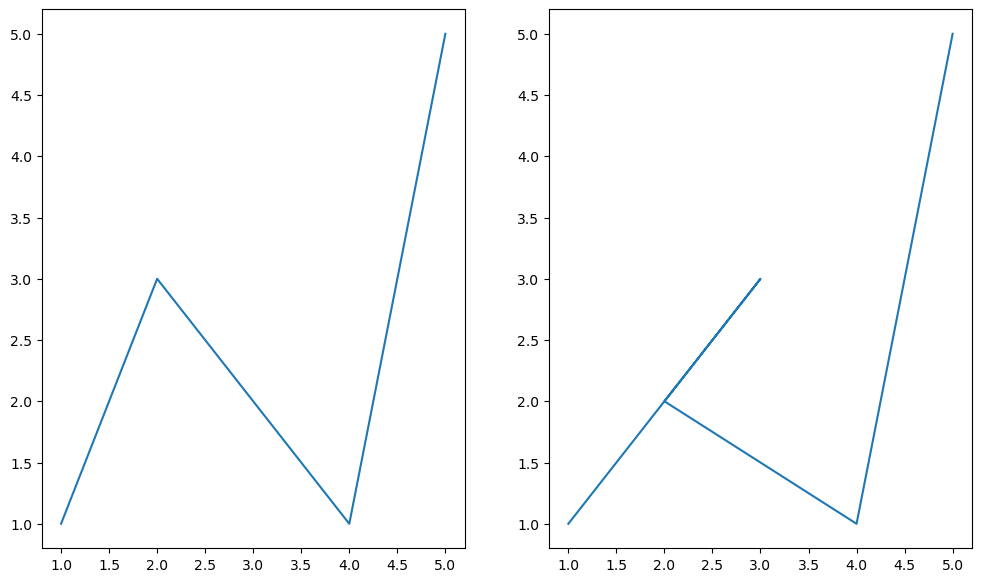

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x1 = [1, 2, 3, 4, 5]
x2 = [1, 3, 2, 4, 5]
y = [1, 3, 2, 1, 5]

axes[0].plot(x1, y)
axes[1].plot(x2, y)

plt.show()

좀 더 테크닉을 사용하면 다음과 같이 다양한 도형이나 원을 그릴 수도 있습니다. (실질적으로는 원이 아닌 정 N각형)

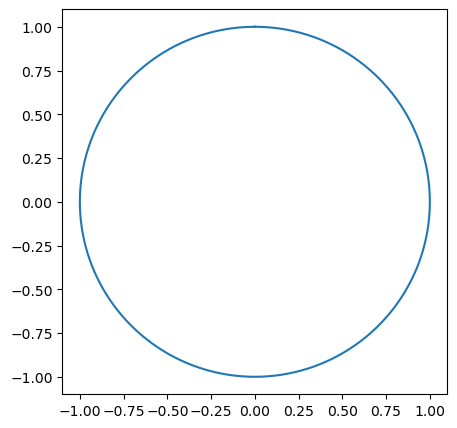

In [24]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, aspect=1)

n = 1000
x = np.sin(np.linspace(0, 2*np.pi, n))
y = np.cos(np.linspace(0, 2*np.pi, n))

ax.plot(x, y)

plt.show()

### 1-2. plot 변형하기

가볍게 랜덤한 데이터를 사용해서 그래프의 요소를 변경해보겠습니다.

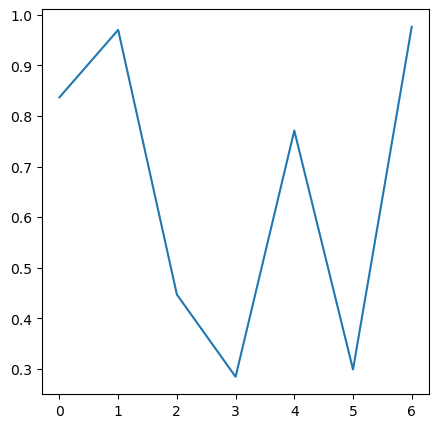

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y)

plt.show()

3가지 요소를 변경하며 감을 잡아봅시다.

- **색(color)**
- **마커(marker)** : [마커의 종류](https://matplotlib.org/stable/api/markers_api.html)
- **선의 종류(linestyle)** : `solid`, `dashed`, `dashdot`, `dotted`, `None`, 

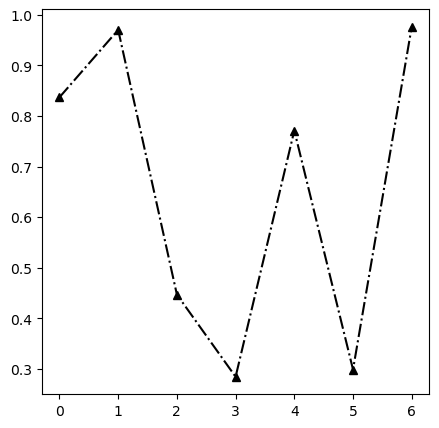

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y,
        color='black',
        marker=['*','0','^','x','s'][2],
        linestyle=['solid', '--', '-.'][2], 
       )

plt.show()

### 1-3. Line plot을 위한 전처리

우선 시계열 데이터를 받아보겠습니다. 

미국 주식 데이터셋입니다. 

- [New York Stock Exchange](https://www.kaggle.com/dgawlik/nyse)

In [27]:
# !kaggle datasets download dgawlik/nyse
# !unzip nyse.zip

In [28]:
stock = pd.read_csv('./prices.csv')
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [29]:
stock['date'] = pd.to_datetime(stock['date'], format='mixed')
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d')
stock.set_index("date", inplace = True)
stock

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


In [30]:
# FAANG (Facebook, Apple, Amazon, Netflix, Google)
apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']
google.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


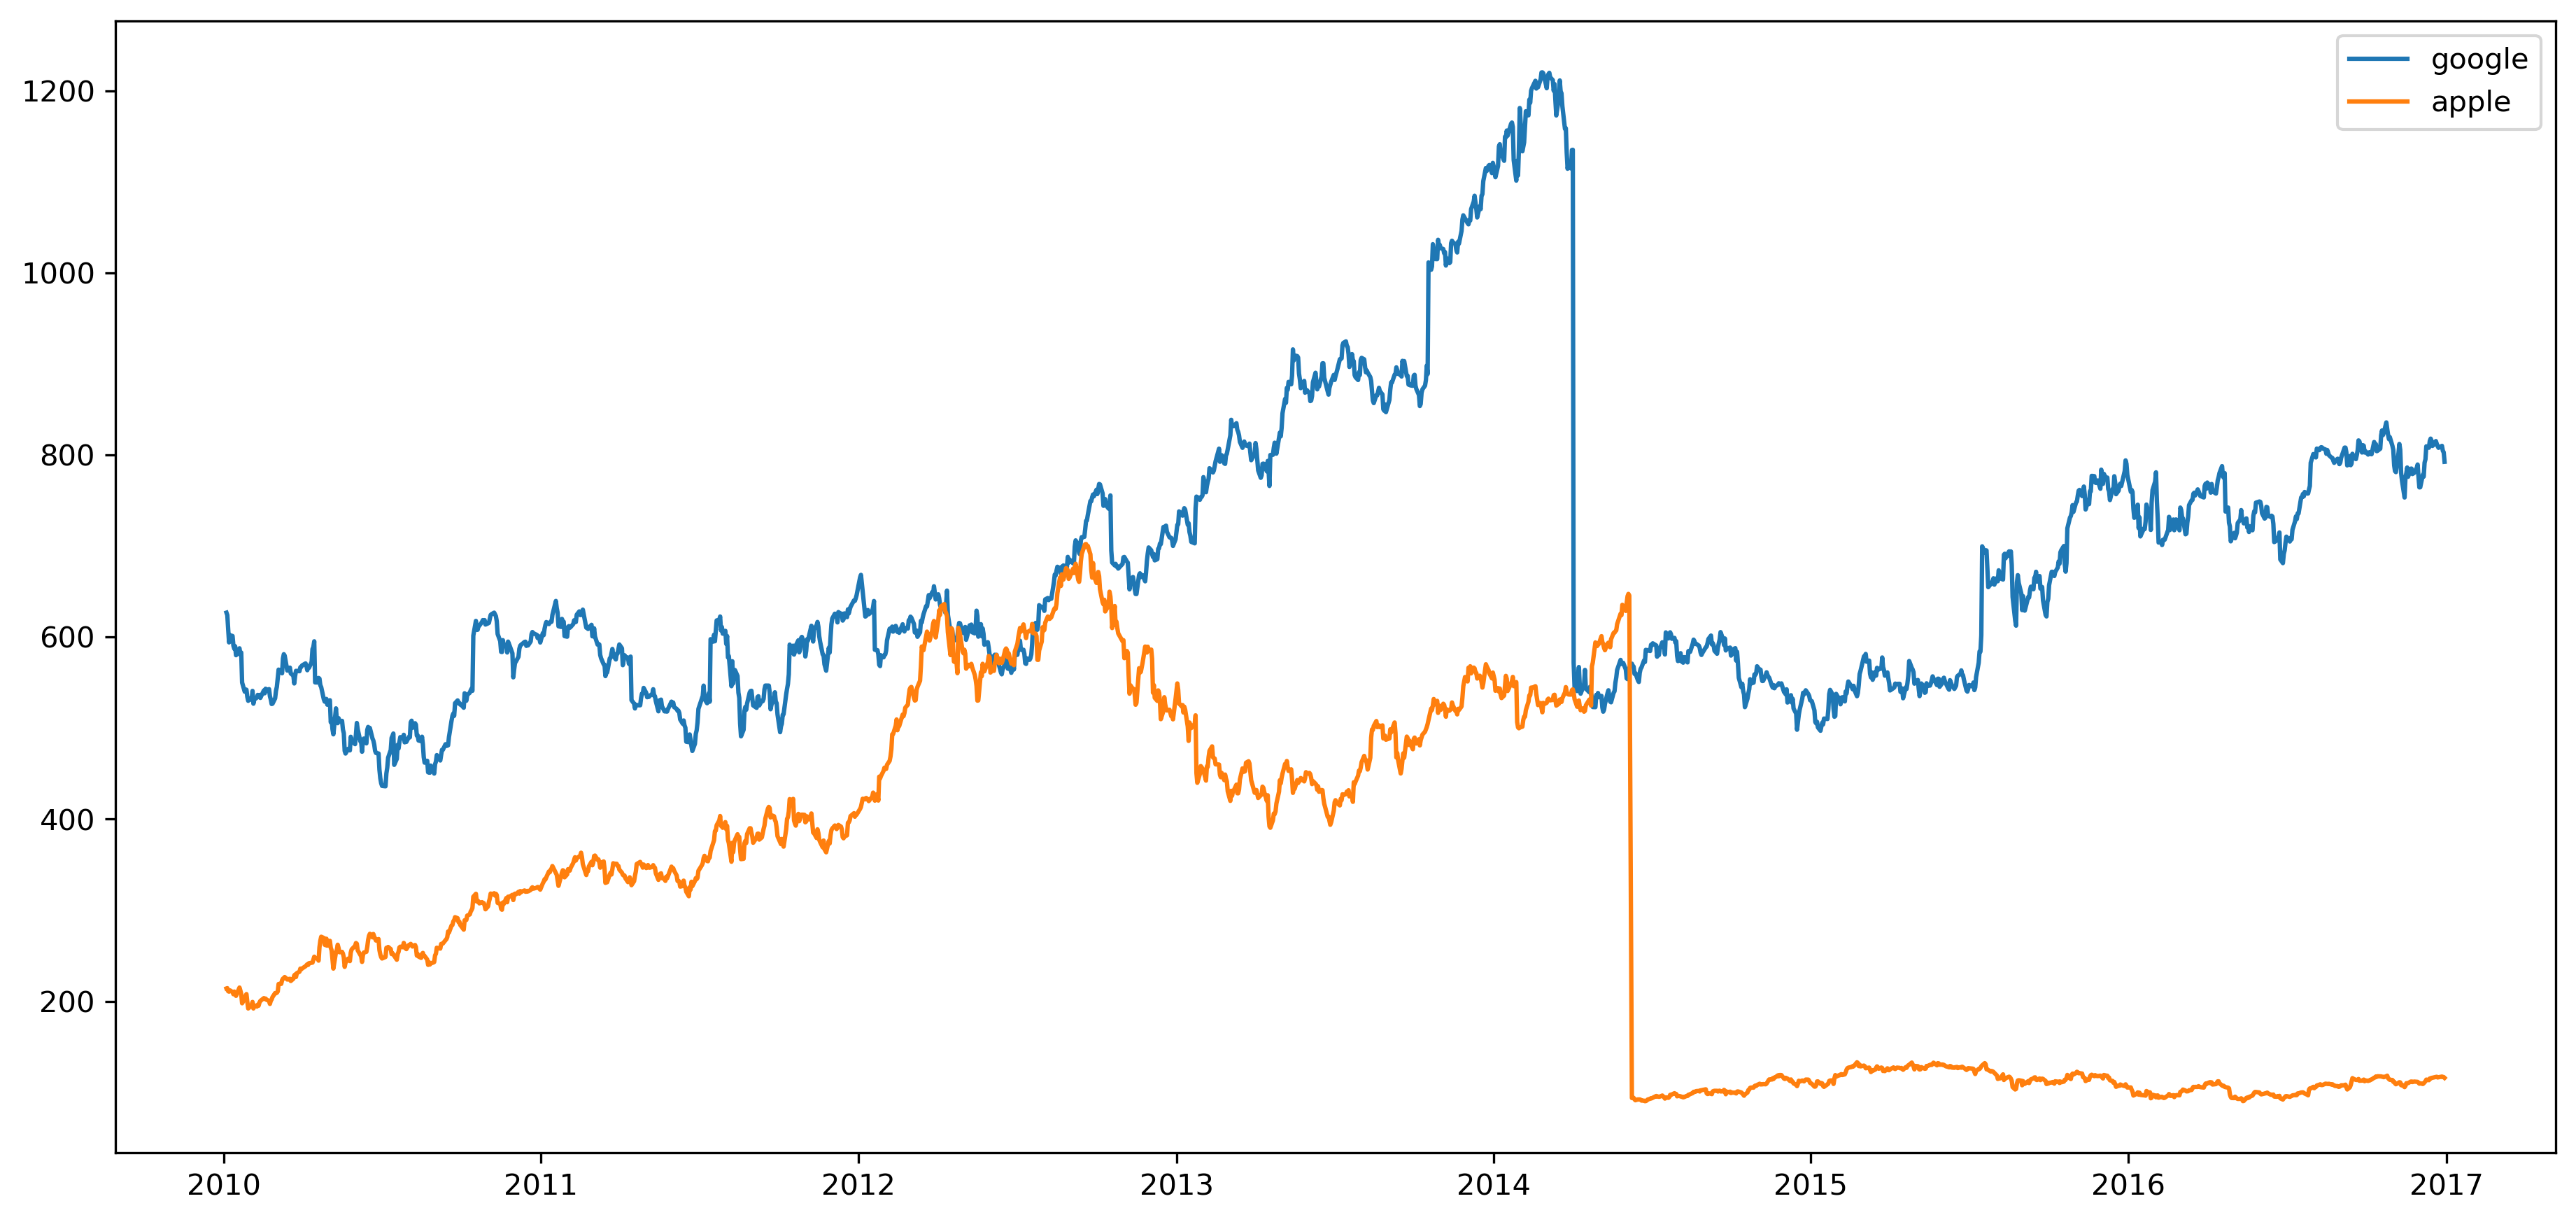

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=300)

ax.plot(google.index, google['close'], label='google')
ax.plot(apple.index, apple['close'], label='apple')

ax.legend() # 범례를 사용하여 구분할 수 있음
plt.show()

이동평균을 사용해보겠습니다. 

* 이동 평균은 시계열 강의에서 다루고 있으며, 간단하게 연속된 N개의 평균을 통해 더 변동성이 적은 데이터를 표현하는 방법입니다.

In [32]:
# google
# rolling: window개씩 columns에 대해서 평균을 보겠다.
google_rolling = google.rolling(window=20)['open', 'close', 'low', 'volume'].mean() # 20일 기준 이동 평균

In [37]:
google.rolling(window=20)['open', 'close', 'low', 'volume'].mean()

,open,close,low,volume
date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-23,797.147498,797.719504,791.492001,1780615.0
2016-12-27,798.663998,798.926505,792.877002,1700895.0
2016-12-28,799.911499,799.683005,793.732001,1682955.0


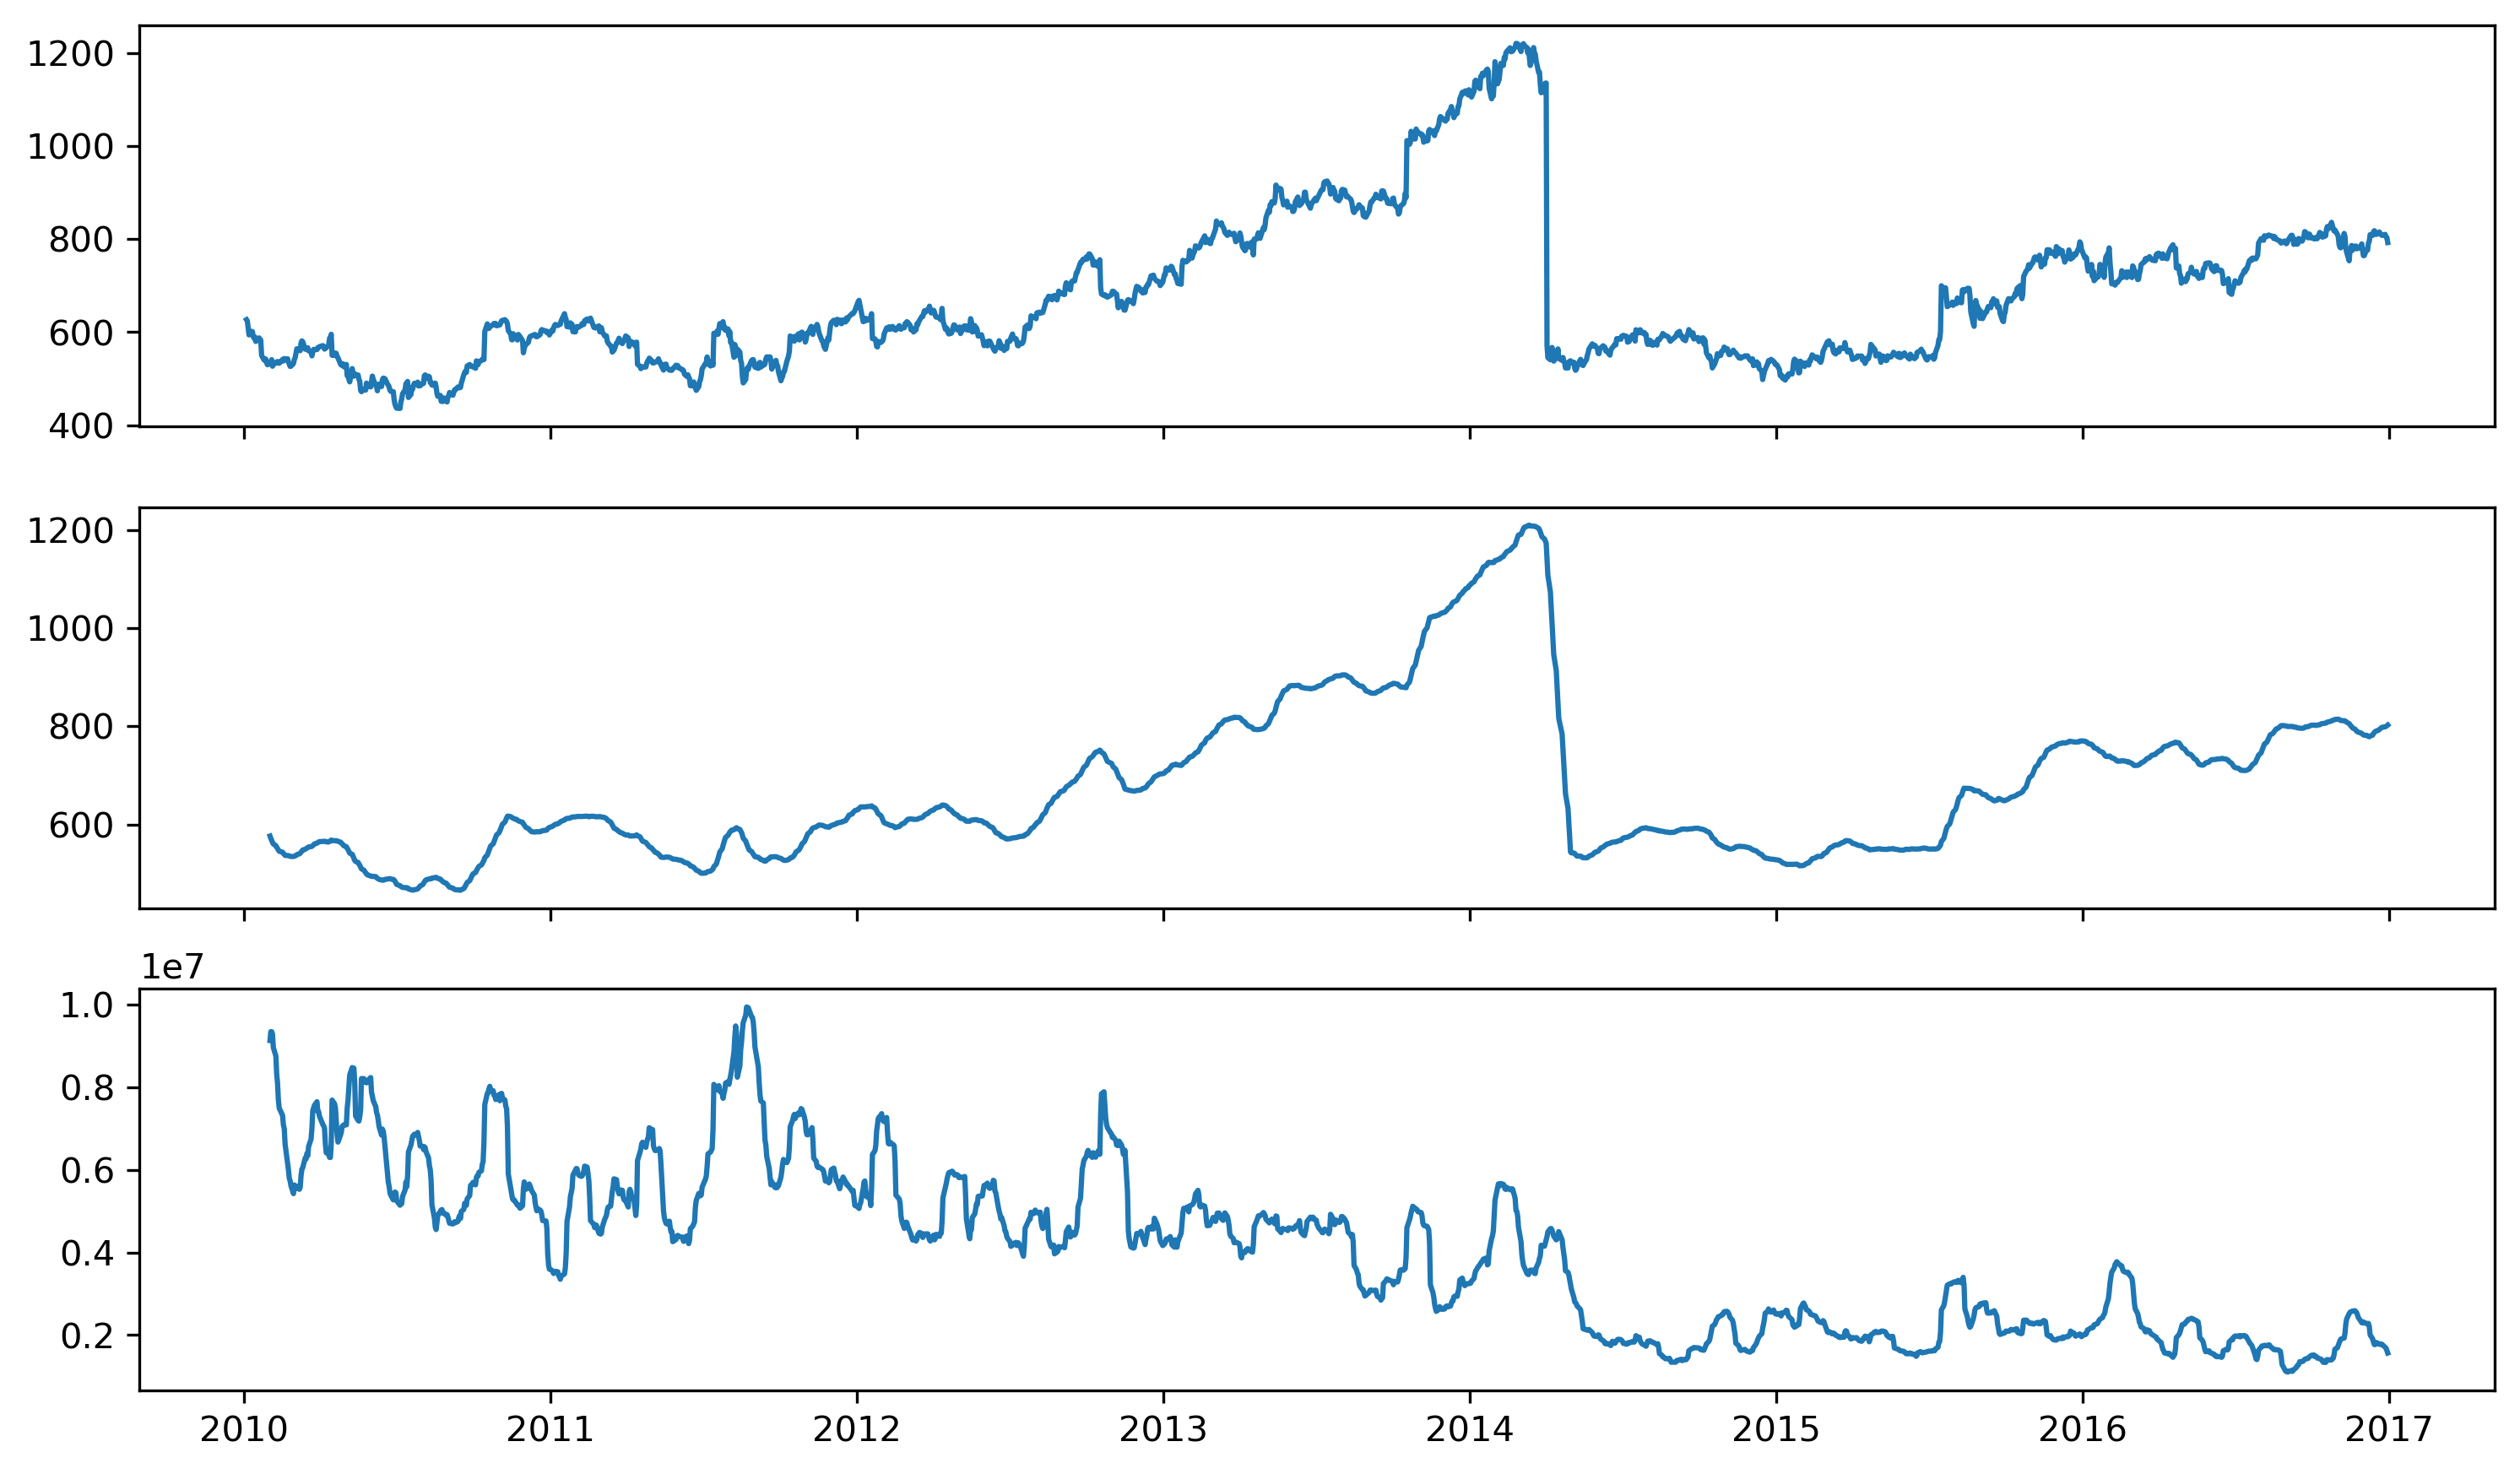

In [38]:
# x축을 공유하는 sharex, y축을 공유하는 sharey를 사용하면 여러 개의 차트를 그릴 때, 비교에 용이하다.
fig, axes = plt.subplots(3, 1, figsize=(12, 7), dpi=300, sharex=True) 

axes[0].plot(google.index,google['close'])
axes[1].plot(google_rolling.index,google_rolling['close'])
axes[2].plot(google_rolling.index, google_rolling['volume'])
plt.show()

## 2. 정확한 Line Plot


### 2.1 추세에 집중 

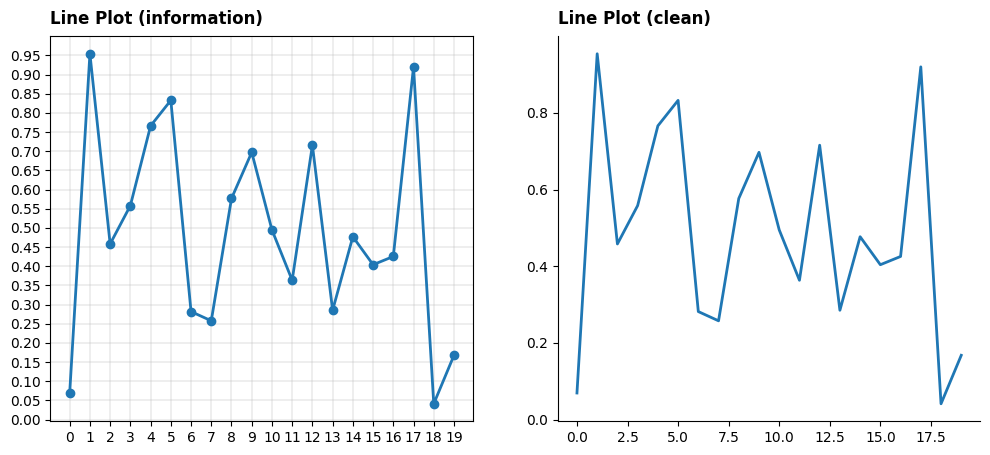

In [28]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(12, 5))
np.random.seed(970725) # random 수를 고정적으로 얻기 위한 시드값

x = np.arange(20)
y = np.random.rand(20)


# Ax1
ax1 = fig.add_subplot(121)
ax1.plot(x, y,
         marker='o',
         linewidth=2)

ax1.xaxis.set_major_locator(MultipleLocator(1)) # x축 기준 단위 변경
ax1.yaxis.set_major_locator(MultipleLocator(0.05)) # y축 기준 단위 변경    
ax1.grid(linewidth=0.3)    


# Ax2
ax2 = fig.add_subplot(122)
ax2.plot(x, y,
       linewidth=2,)

ax2.spines[['top', 'right']].set_visible(False)
ax1.set_title(f"Line Plot (information)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')
ax2.set_title(f"Line Plot (clean)", loc='left', fontsize=12, va= 'bottom', fontweight='semibold')


plt.show()

### 2-2. 간격 

같은 데이터임에도 불구하고 x축의 간격에 따라, 해석이 잘못될 수 있습니다.

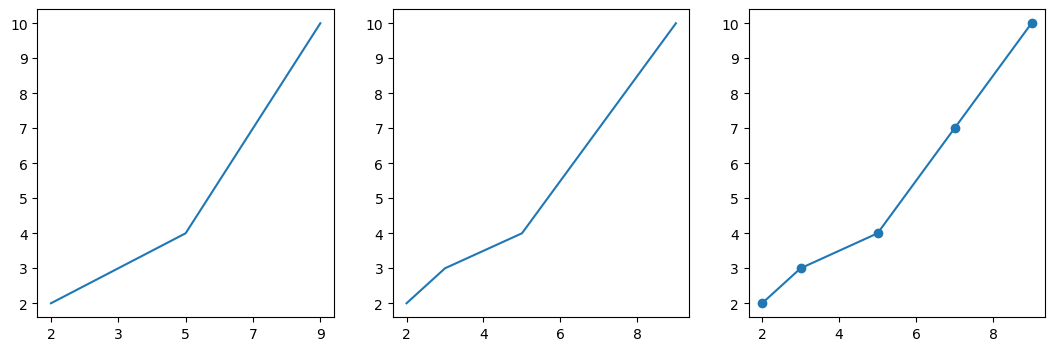

In [40]:
x = [2, 3, 5, 7, 9]
y = [2, 3, 4, 7, 10]

fig, ax = plt.subplots(1, 3, figsize=(13, 4))
ax[0].plot([str(i) for i in x], y)
# ax[0].plot([str(i) for i in x], y, marker='o')
ax[1].plot(x, y)
ax[2].plot(x, y, marker='o')
plt.show()

### 2-3. 보간

- https://www.delftstack.com/howto/matplotlib/matplotlib-plot-smooth-curve/

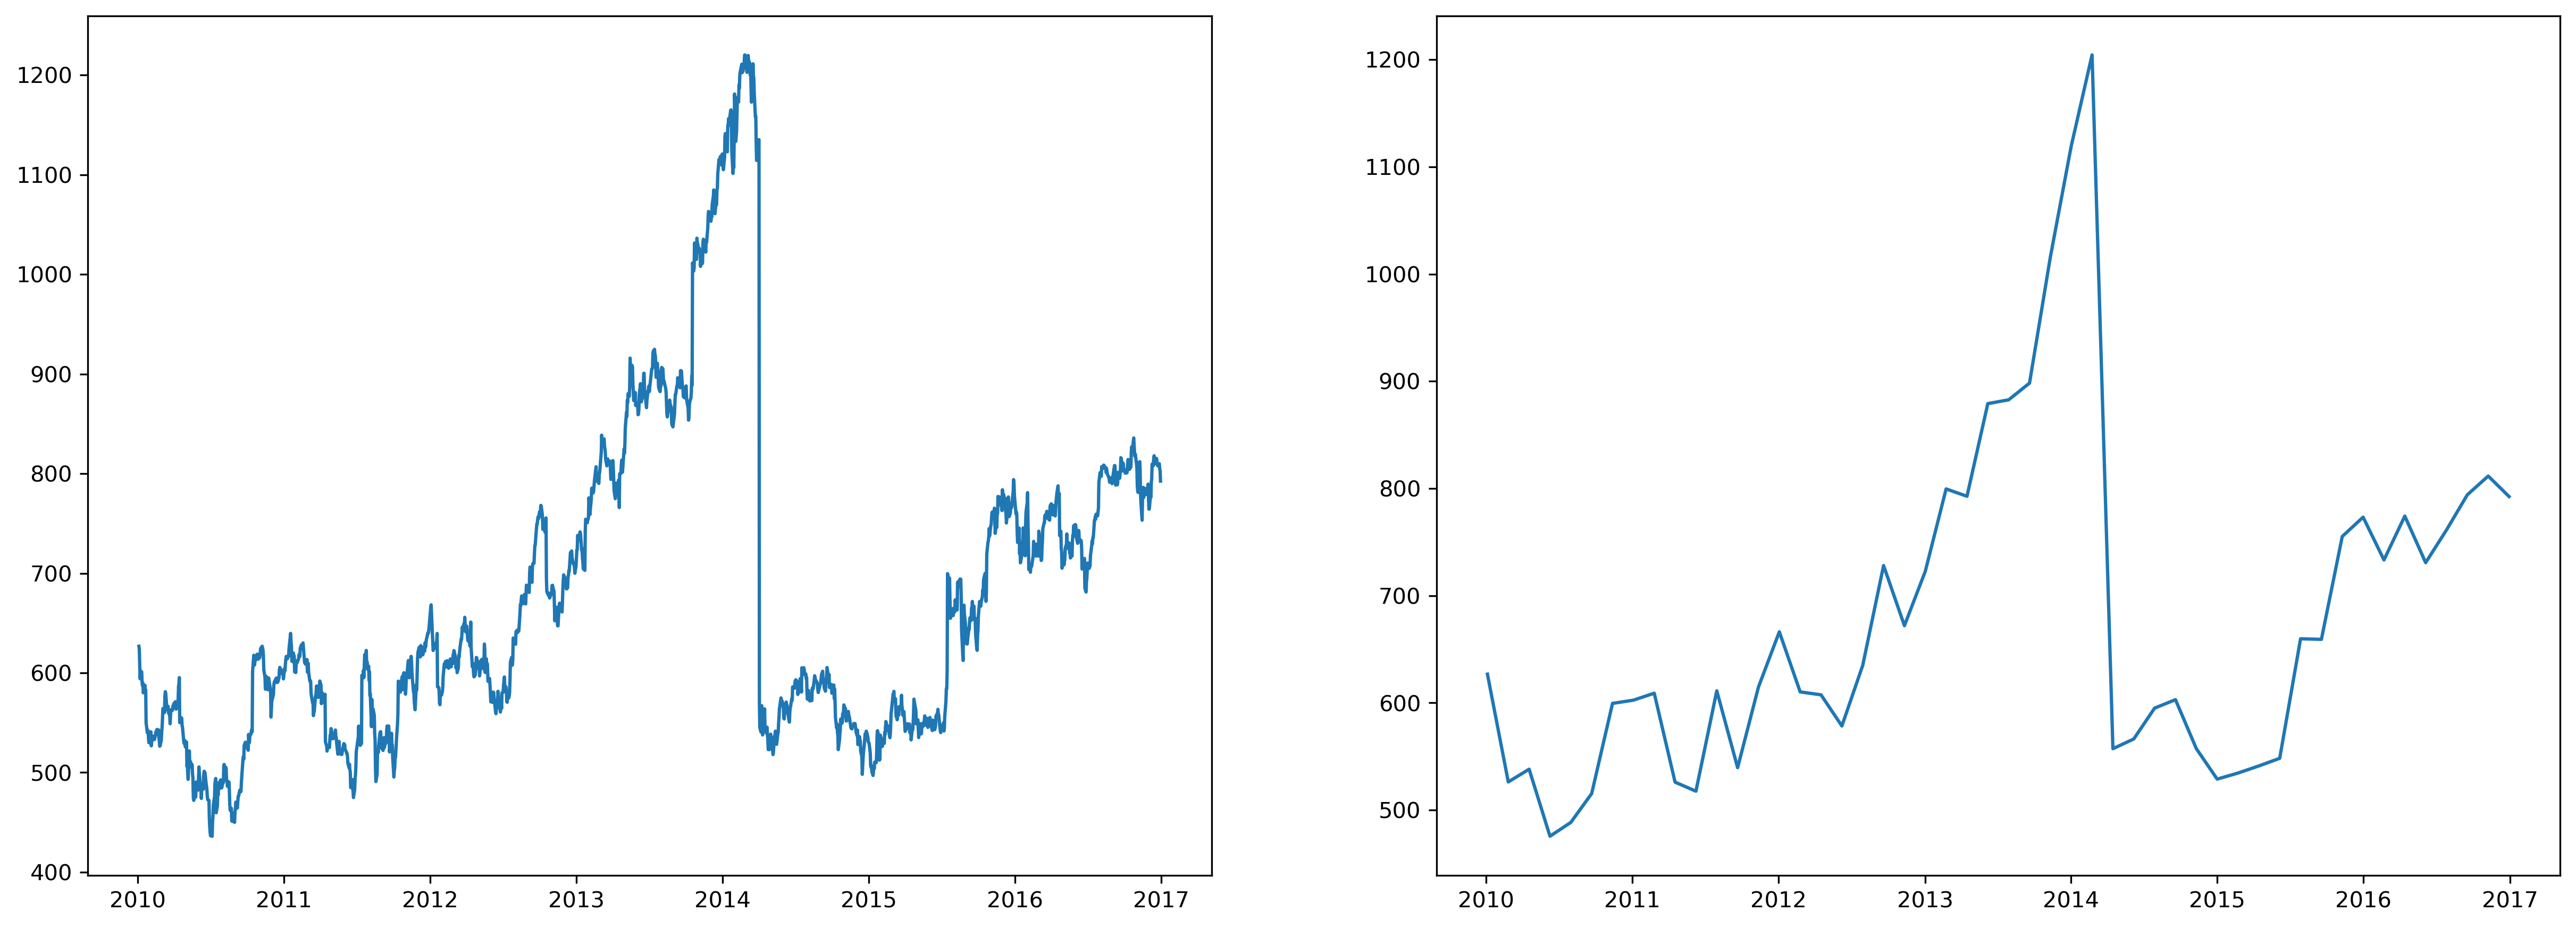

In [42]:
# 지양합니다. 이동평균 씁니다.

from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7), dpi=300)

date_np = google.index # x축 데이터
value_np = google['close'] # y축에 사용할 주식 가격 데이터

# smooth
date_num = dates.date2num(date_np) # smoothing을 위해 날짜 데이터를 수치로 변경
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50) # 날짜 데이터를 50개의 포인트로 변경
spl = make_interp_spline(date_num, value_np) # 빈 부분에 대한 보간
value_np_smooth = spl(date_num_smooth) # 보간된 데이터를 바탕으로 변경된 날짜 데이터 포인트로 변경

# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

plt.show()

### 2-4. 이중 축 사용

- `twinx()` 사용하기

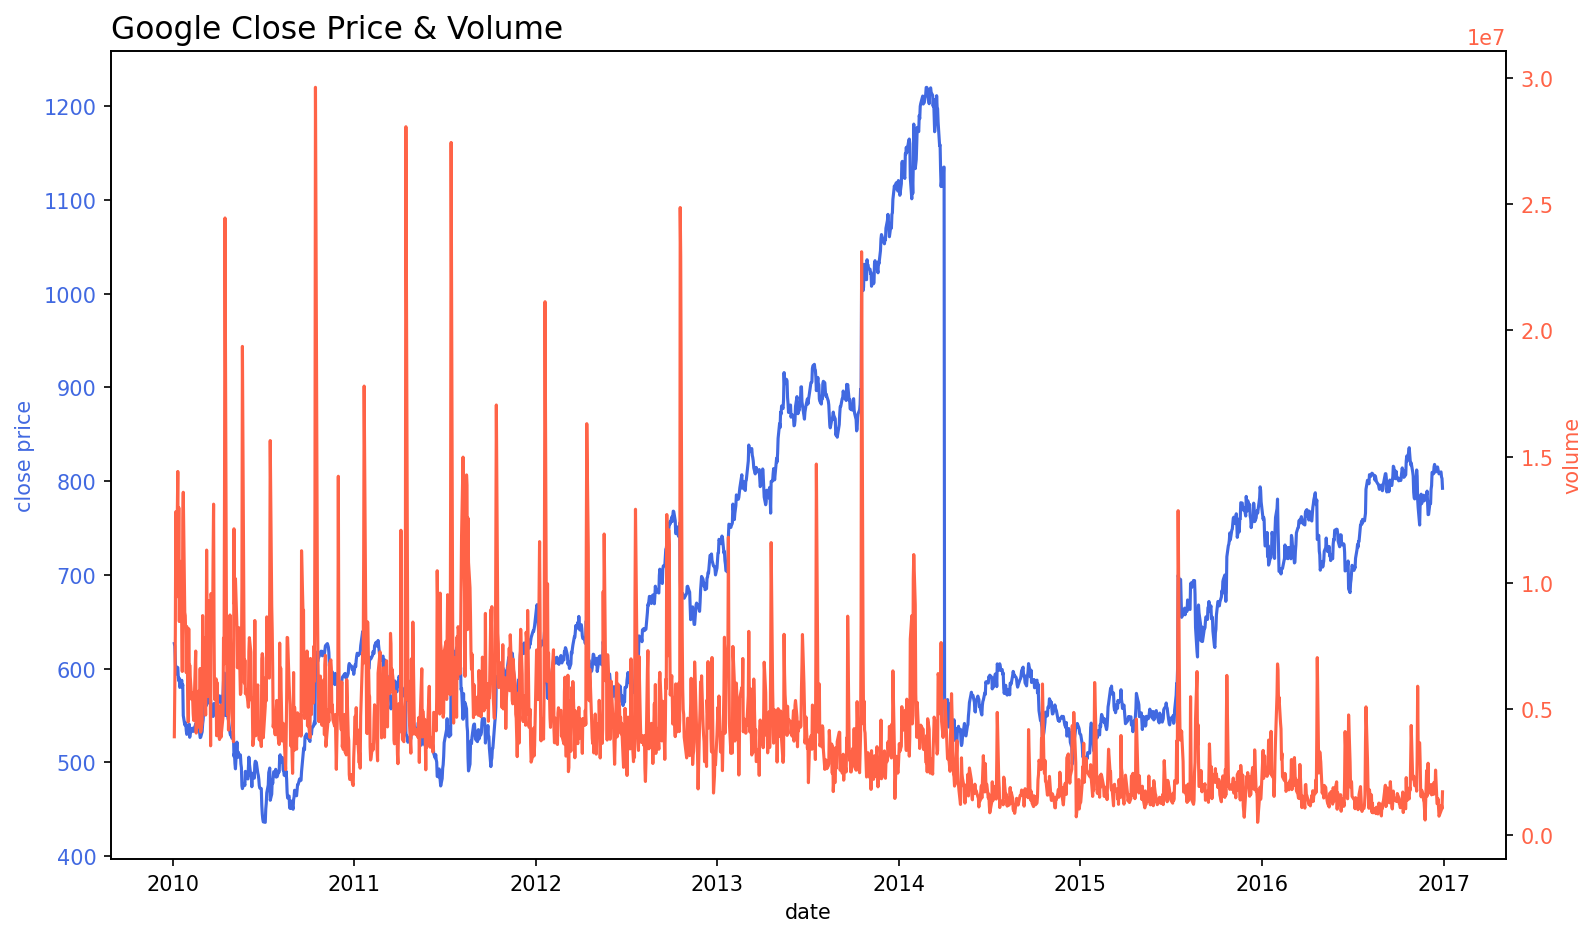

In [43]:
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

# First Plot
color = 'royalblue'

ax1.plot(google.index, google['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.tick_params(axis='y', labelcolor=color)

# # Second Plot
ax2 = ax1.twinx()  
# 새로운 ax에 ax1 복사한거
color = 'tomato'

ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

- `secondary-xaxis()` : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html

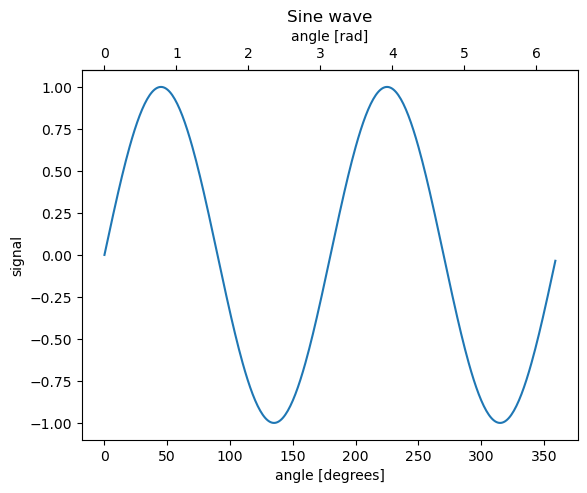

In [45]:
def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()
x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()

### 2-5. ETC

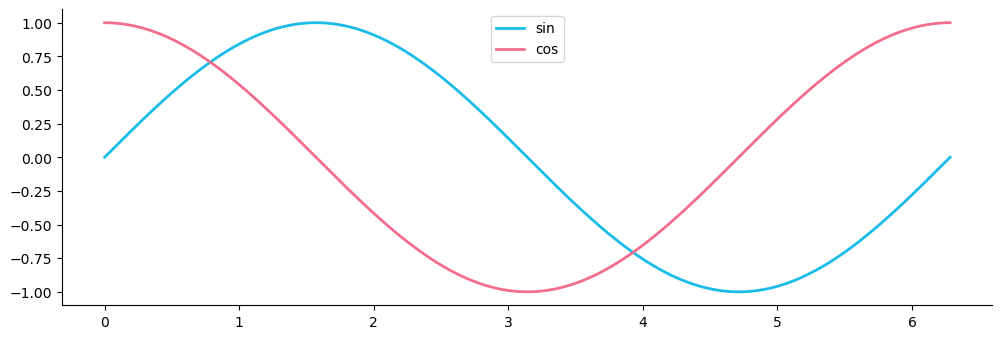

In [46]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)


ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2, label='sin')

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2, label='cos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper center')

plt.show()

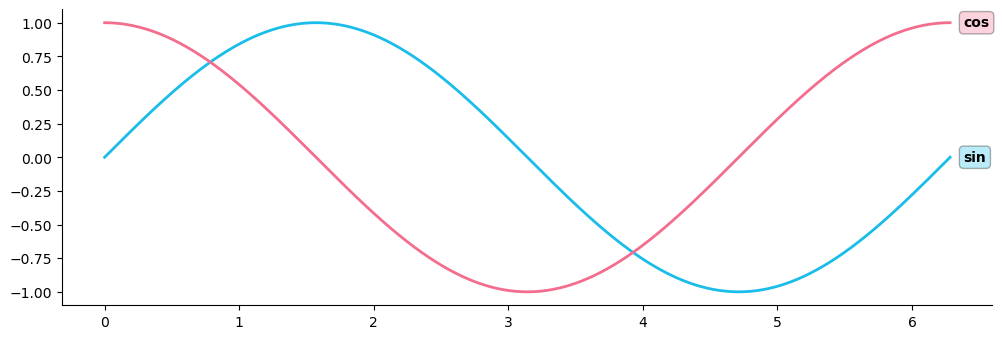

In [47]:

fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

# Ax2
ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2,)

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2,)


# 범례 코드
# x끝값+0.1, y끝값, 넣을텍스트s, vertical/horizontal align, 텍스트박스 bbox
ax.text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))

ax.text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

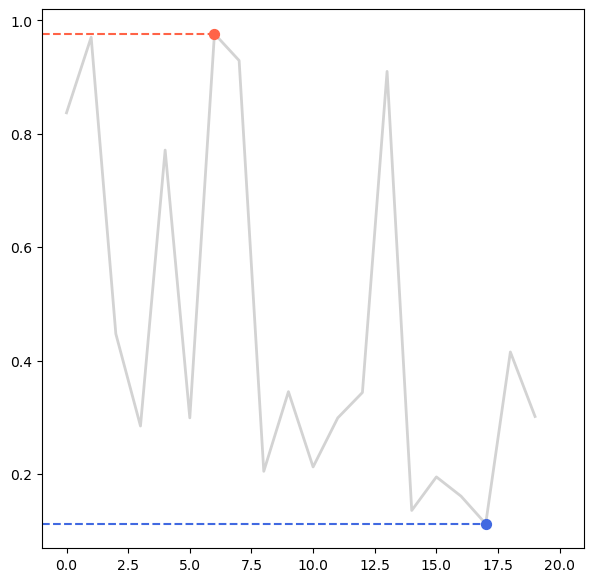

In [48]:
fig = plt.figure(figsize=(7, 7))

np.random.seed(97)

x = np.arange(20)
y = np.random.rand(20)

ax = fig.add_subplot(111)
ax.plot(x, y,
       color='lightgray',
       linewidth=2,)

ax.set_xlim(-1, 21)

# max
ax.plot([-1, x[np.argmax(y)]], [np.max(y)]*2, # -1부터 최댓값의 x값까지 최댓값 유지
        linestyle='--', color='tomato'
       )

ax.scatter(x[np.argmax(y)], np.max(y), 
            c='tomato',s=50, zorder=20)

# min
ax.plot([-1, x[np.argmin(y)]], [np.min(y)]*2,
        linestyle='--', color='royalblue'
       )
ax.scatter(x[np.argmin(y)], np.min(y), 
            c='royalblue',s=50, zorder=20)

plt.show()

### **콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

